In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\gagan soni\Downloads\mouse_viral_study_svm.csv")
df

Med_1_mL  Med_2_mL  Virus Present
0    6.508231  8.582531              0
1    4.126116  3.073459              1
2    6.427870  6.369758              0
3    3.672953  4.905215              1
4    1.580321  2.440562              1
..        ...       ...            ...
395  2.884122  3.271748              1
396  7.290855  9.488672              0
397  7.895325  8.272529              0
398  2.690592  2.674979              1
399  7.587821  9.473968              0

[400 rows x 3 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


<Axes: xlabel='Med_1_mL', ylabel='Med_2_mL'>

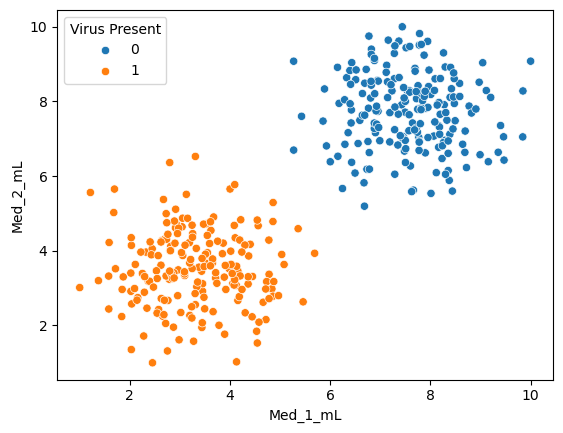

In [4]:
sns.scatterplot(data = df , x = df.Med_1_mL,y = df.Med_2_mL,hue = 'Virus Present')

In [5]:
X = df[['Med_1_mL','Med_2_mL']]
y = df['Virus Present']

In [6]:
X_train,X_test,y_train,y_test  = train_test_split(X,y , random_state = 9 , test_size = 0.2)

## support vectior machinee (SVM)
* with default parameter

### Hyperparameter tuning 

In [7]:
estimator = SVC()
param_grid = {'C':[0.01,0.1,1,10,100],'kernel':['linear','rbf','sigmoid','poly']}
grid = GridSearchCV(estimator,param_grid,cv = 5)
grid.fit(X_train,y_train)
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

## Rebuild the SVM model with best parameters

In [8]:
# modeling 
svm_model = SVC(C = 0.01,kernel = 'linear')
svm_model.fit(X_train,y_train)

# train accuracy 
y_pred_train = svm_model.predict(X_train)
print('train aaccuracy',accuracy_score(y_train,y_pred_train))

# cross validatoin score 
print('cross validation score is :',cross_val_score(svm_model,X_train,y_train,cv = 5).mean())

# test accuracy 
y_pred_test = svm_model.predict(X_test)
print('test accuracy is :', accuracy_score(y_test,y_pred_test))

train aaccuracy 1.0
cross validation score is : 1.0
test accuracy is : 1.0


In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix (y_test,y_pred_test)

array([[38,  0],
       [ 0, 42]], dtype=int64)

In [10]:
from sklearn.metrics import classification_report
classification_report (y_test,y_pred_test)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        38\n           1       1.00      1.00      1.00        42\n\n    accuracy                           1.00        80\n   macro avg       1.00      1.00      1.00        80\nweighted avg       1.00      1.00      1.00        80\n'